In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import seaborn as sns
from PIL import Image
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC, SVC

In [ ]:
features = pd.read_excel('features_1.xlsx')

In [ ]:
features = features.drop(columns=['Unnamed: 0'])

In [ ]:
features

,contrast,dissimilarity,homogeneity,ASM,energy,Label,Unnamed: 7,Unnamed: 8,contrast.1,dissimilarity.1,homogeneity.1,ASM.1,energy.1
0,12769357,562393,2747.881680,312782,559.269166,0,NaN,quebra,1.137901e+07,520695.140000,3139.132210,3.585647e+05,594.820786
1,9580203,482361,3307.995564,289038,537.622544,0,NaN,inclusão,3.818199e+05,91542.516667,14077.149180,4.476131e+06,2067.330784
2,10928946,517098,3084.553772,337650,581.076587,0,NaN,manchas,9.701245e+06,449447.623333,5721.048706,1.576351e+07,2404.479182
3,12465011,556457,2776.650206,372854,610.617720,0,NaN,corrosao por pite,2.296732e+06,210095.453333,9282.596266,1.294473e+07,2222.867379
4,6088850,375354,4293.162968,371518,609.522764,0,NaN,carepa,2.210379e+06,231534.090000,6393.583508,1.366001e+06,1151.400414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,878418,124428,11710.060699,2728618,1651.852899,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1796,477005,93119,14425.559150,3308128,1818.825995,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1797,1400820,151900,10458.336605,1487772,1219.742596,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,368408,91122,13919.297455,3666654,1914.850908,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
conditions = [
    (features['Label'] == 0),
    (features['Label'] == 1),
    (features['Label'] == 2),
    (features['Label'] == 3),
    (features['Label'] == 4),
    (features['Label'] == 5)]
choices = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais']
features['defeitos'] = np.select(conditions, choices)
features

,contrast,dissimilarity,homogeneity,ASM,energy,Label,Unnamed: 7,Unnamed: 8,contrast.1,dissimilarity.1,homogeneity.1,ASM.1,energy.1,defeitos
0,12769357,562393,2747.881680,312782,559.269166,0,NaN,quebra,1.137901e+07,520695.140000,3139.132210,3.585647e+05,594.820786,Quebra
1,9580203,482361,3307.995564,289038,537.622544,0,NaN,inclusão,3.818199e+05,91542.516667,14077.149180,4.476131e+06,2067.330784,Quebra
2,10928946,517098,3084.553772,337650,581.076587,0,NaN,manchas,9.701245e+06,449447.623333,5721.048706,1.576351e+07,2404.479182,Quebra
3,12465011,556457,2776.650206,372854,610.617720,0,NaN,corrosao por pite,2.296732e+06,210095.453333,9282.596266,1.294473e+07,2222.867379,Quebra
4,6088850,375354,4293.162968,371518,609.522764,0,NaN,carepa,2.210379e+06,231534.090000,6393.583508,1.366001e+06,1151.400414,Quebra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,878418,124428,11710.060699,2728618,1651.852899,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais
1796,477005,93119,14425.559150,3308128,1818.825995,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais
1797,1400820,151900,10458.336605,1487772,1219.742596,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais
1798,368408,91122,13919.297455,3666654,1914.850908,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais


In [ ]:
X = features.iloc[:,0:5]
from sklearn import preprocessing
#X = X.T
X = preprocessing.scale(X)
#X = X.T
Y = features.iloc[:,-1]
X

array([[ 1.69863129,  1.67757721, -1.27361365, -0.25481436, -0.63918424],
       [ 1.03680113,  1.21645759, -1.15500881, -0.25577716, -0.6507378 ],
       [ 1.31669943,  1.41660143, -1.2023229 , -0.25380597, -0.62754486],
       ...,
       [-0.66062783, -0.68755644,  0.35908505, -0.20716914, -0.28666661],
       [-0.87487945, -1.03774047,  1.09194793, -0.11881664,  0.08433686],
       [-0.77179914, -0.78490596,  0.38800515, -0.17711185, -0.14082446]])

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 18)

In [ ]:
from sklearn import svm

In [ ]:
modelo1 = svm.SVC(kernel='rbf', C=2000, gamma = 1)

In [ ]:
modelo1.fit(X_treino, Y_treino)

SVC(C=2000, gamma=1)

In [ ]:
modelo1.predict([[-0.66062783, -0.68755644,  0.35908505, -0.20716914, -0.28666661]])

array(['Marcas Superficiais'], dtype=object)

In [ ]:
accuracy_score(Y_treino, modelo1.predict(X_treino))

0.9652777777777778

In [ ]:
accuracy_score(Y_teste, modelo1.predict(X_teste))

0.9583333333333334

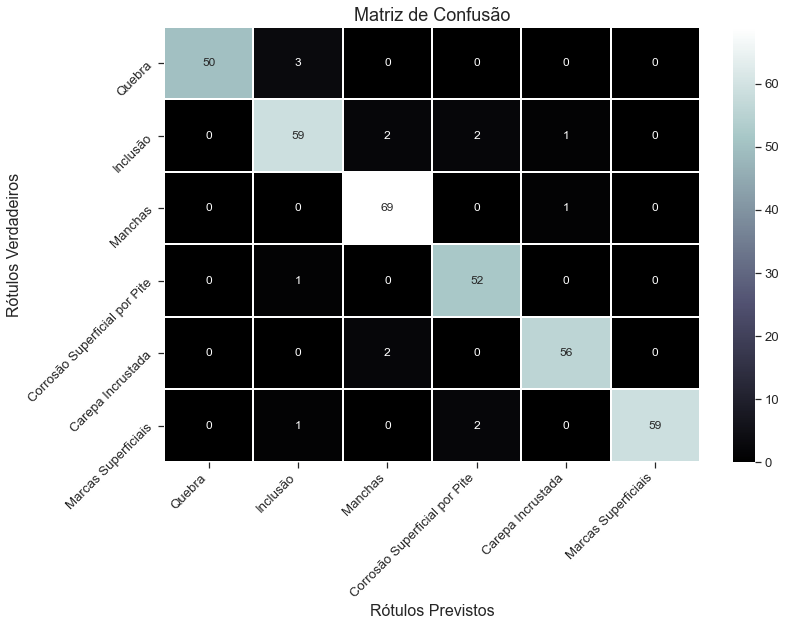

In [ ]:
pred = modelo1.predict(X_teste)

import matplotlib.pyplot as plt

c_matrix = confusion_matrix(pred, Y_teste)
ax = plt.subplot()
sns.set(style="ticks", color_codes=True, rc={"figure.figsize": (12, 8)}, font_scale=1.2)
sns.heatmap(c_matrix, annot=True, ax = ax, annot_kws={"size": 12}, linewidths=1, cmap = "bone");
ax.set_xlabel('Rótulos Previstos', size = '16'); ax.set_ylabel('Rótulos Verdadeiros', size = '16');
ax.set_title('Matriz de Confusão', size = '18')
ax.xaxis.set_ticklabels(choices, rotation = 45, ha = 'right'); ax.yaxis.set_ticklabels(choices, rotation = 45);

In [ ]:
#sns.pairplot(features[['contrast', 'dissimilarity', 'homogeneity',
       # 'ASM','energy','defeitos']], hue='defeitos')

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1, 10, 50, 100, 250, 500, 1000, 2000, 3000],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4, 5],
    'gamma': [0.0001, 0.001, 0.01, 0.1 , 1, 5, 10]
}
grid_SVC = GridSearchCV(estimator = SVC(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_SVC.fit(X_treino, Y_treino)